# Credit EDA Case Study

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 120)

In [4]:
# Reading the 'application_data.csv' file
appdata = pd.read_csv('application_data.csv')
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,...,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,...,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,...,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.

In [5]:
# Checking the shape of the dataframe 
appdata.shape

(307511, 122)

In [6]:
# Checking the info of the dataframe
appdata.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
# Describing the dataframe to view it's summary
appdata.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
appdata.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

Clearly, the data is highly imbalanaced. We must keep this in mind while conducting our analysis.

In [9]:
# Checking for percentage of null values in the dataframe

null_per = appdata.isnull().sum()/len(appdata)*100 
null_per.sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

# Data cleaning 

In [10]:
# Dropping columns where NA/null values are more than 35%

appdata2 = appdata.drop(appdata.columns[appdata.isnull().mean() >= 0.35], axis = 1)
print('Dimension of the original dataset ',appdata.shape)
print('Dimension of the dataset after removing the missing values',appdata2.shape)

Dimension of the original dataset  (307511, 122)
Dimension of the dataset after removing the missing values (307511, 73)


In [11]:
# Percentage of missing values for the remaining columns

null_per2 = 100*(appdata2.isnull().sum() / len(appdata2.index))
null_per2.sort_values(ascending = False).head(20)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
dtype: float64

# Imputation of data

Imputation in categorical variables 

In [12]:
# First check for OCCUPATION_TYPE column

df_occu=appdata2[appdata2.OCCUPATION_TYPE.isna()==True] 
df_occu.head(50)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246.0,-2512,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.555183,0.652897,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012.0,-3684,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.624305,0.669057,0.0,0.0,0.0,0.0,-795.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,675000.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,0.046220,-9994,-1796,-4668.0,-2661,1,1,0,1,0,1,NaN,1.0,1,1,WEDNESDAY,11,0,1,1,0,0,0,Military,0.685011,0.524496,0.0,0.0,0.0,0.0,-849.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,-23920,365243,-9817.0,-4969,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,XNA,0.650765,0.751724,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,-23548,365243,-5745.0,-4576,1,0,0,1,0,0,NaN,1.0,2,2,WEDNESDAY,9,0,0,0,0,0,0,XNA,0.766138,0.684828,0.0,0.0,0.0,0.0,-491.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
44,100051,0,Cash loans,M,N,Y,0,202500.000,661702.5,48280.5,598500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007114,-9827,-758,-4166.0,-2380,1,1,1,1,0,0,NaN,2.0,2,2,WEDNESDAY,12,0,0,0,0,1,1,B

By looking at the dataframe, we can guess anything from other columns, there is a mix of all values in other columns. However, there might be a valid reason for not mentioning occupation. We do not want to delete that many rows, neither do we wish to impute incorrect guesses. Instead, we impute a string 'Other' in place of the missing values. 

In [13]:
appdata2.OCCUPATION_TYPE.fillna('Other', inplace=True)

In [14]:
appdata2.OCCUPATION_TYPE.isna().sum()

0

In [15]:
# Then, we impute the misiing values for NAME_TYPE_SUITE

appdata2['NAME_TYPE_SUITE'].fillna(appdata2.NAME_TYPE_SUITE.mode()[0], inplace=True)
appdata2["NAME_TYPE_SUITE"].isna().sum()

0

In [16]:
appdata2.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [17]:
appdata2.OCCUPATION_TYPE.value_counts()

Other                    96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Imputation in numerical variables

In [18]:
# We follow the same procedure of imputing mode for numeric variable

print(appdata2.AMT_REQ_CREDIT_BUREAU_YEAR.mode() )
appdata2['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(appdata2.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0], inplace=True)

0    0.0
dtype: float64


In [19]:
appdata2.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

In [20]:
# Similar to the column 'AMT_REQ_CREDIT_BUREAU_YEAR', we can impute the missing values of columns: 
#'AMT_REQ_CREDIT_BUREAU_MON'
#'AMT_REQ_CREDIT_BUREAU_WEEK'
#'AMT_REQ_CREDIT_BUREAU_DAY'
#'AMT_REQ_CREDIT_BUREAU_HOUR'
#'AMT_REQ_CREDIT_BUREAU_QRT' 

#Let's check their mode values

appdata2.AMT_REQ_CREDIT_BUREAU_MON.mode()


0    0.0
dtype: float64

In [21]:
appdata2.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

In [22]:
appdata2.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [23]:
appdata2.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [24]:
appdata2.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

In [25]:
# Since these columns all have modal value = 0.0, we can impute the same. 

appdata2[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT']]= appdata2[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT']].fillna(value=0.0)

In [26]:
# Let's check for the column 'AMT_GOODS_PRICE'

appdata2.AMT_GOODS_PRICE.value_counts() 

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

<AxesSubplot:>

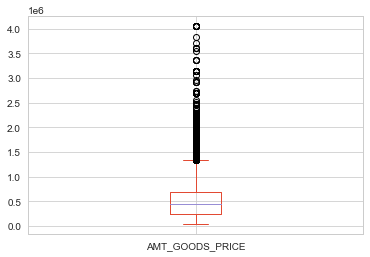

In [186]:
sns.set_style('whitegrid')
appdata2.AMT_GOODS_PRICE.plot.box()

There are clearly some outliers in the column values

We can impute median value for this column

In [28]:
print(appdata2.AMT_GOODS_PRICE.median())
appdata2['AMT_GOODS_PRICE'].fillna(appdata2.AMT_GOODS_PRICE.median(), inplace=True) 

450000.0


In [29]:
appdata2['AMT_GOODS_PRICE'].isna().sum()

0

<AxesSubplot:>

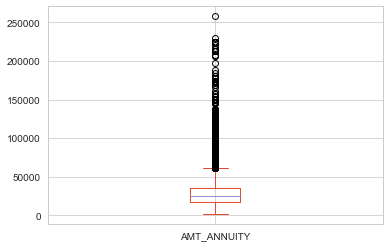

In [187]:
# Let's check for the column 'AMT_ANNUITY'

appdata2.AMT_ANNUITY.plot.box()

In [31]:
# We do the same for this column as well

appdata2['AMT_ANNUITY'].fillna(appdata2.AMT_ANNUITY.median(), inplace=True) 

Let's check for the missing values that are still left

In [32]:
appdata2.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [33]:
na_values=appdata2.isnull().sum()/len(appdata2)*100
na_values.sort_values(ascending=False).head(10)

EXT_SOURCE_3                19.825307
OBS_30_CNT_SOCIAL_CIRCLE     0.332021
DEF_30_CNT_SOCIAL_CIRCLE     0.332021
OBS_60_CNT_SOCIAL_CIRCLE     0.332021
DEF_60_CNT_SOCIAL_CIRCLE     0.332021
EXT_SOURCE_2                 0.214626
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
FLAG_DOCUMENT_4              0.000000
FLAG_DOCUMENT_7              0.000000
dtype: float64

EXT_SOURCE_3 has nearly 20% missing values and we cannot guess a value to impute by inspecting the column like mean, median, mode etc. Therefore, we decide to remove this column. 

In [34]:
appdata2.drop('EXT_SOURCE_3', axis=1, inplace=True)

In [35]:
na_values=appdata2.isnull().sum()
na_values.sort_values(ascending=False).head(10)

OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
EXT_SOURCE_2                 660
CNT_FAM_MEMBERS                2
DAYS_LAST_PHONE_CHANGE         1
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_7                0
dtype: int64

Now, we shall drop those rows where these column values are null.

In [36]:
appdata3 = appdata2[appdata2.OBS_30_CNT_SOCIAL_CIRCLE.isna()==False]
appdata3 = appdata3[appdata3.DEF_30_CNT_SOCIAL_CIRCLE.isna()==False]
appdata3 = appdata3[appdata3.OBS_60_CNT_SOCIAL_CIRCLE.isna()==False]
appdata3 = appdata3[appdata3.DEF_60_CNT_SOCIAL_CIRCLE.isna()==False]
appdata3 = appdata3[appdata3.EXT_SOURCE_2.isna()==False]
appdata3 = appdata3[appdata3.CNT_FAM_MEMBERS.isna()==False]
appdata3 = appdata3[appdata3.DAYS_LAST_PHONE_CHANGE.isna()==False]

In [37]:
appdata3.isna().any()

SK_ID_CURR                     False
TARGET                         False
NAME_CONTRACT_TYPE             False
CODE_GENDER                    False
FLAG_OWN_CAR                   False
FLAG_OWN_REALTY                False
CNT_CHILDREN                   False
AMT_INCOME_TOTAL               False
AMT_CREDIT                     False
AMT_ANNUITY                    False
AMT_GOODS_PRICE                False
NAME_TYPE_SUITE                False
NAME_INCOME_TYPE               False
NAME_EDUCATION_TYPE            False
NAME_FAMILY_STATUS             False
NAME_HOUSING_TYPE              False
REGION_POPULATION_RELATIVE     False
DAYS_BIRTH                     False
DAYS_EMPLOYED                  False
DAYS_REGISTRATION              False
DAYS_ID_PUBLISH                False
FLAG_MOBIL                     False
FLAG_EMP_PHONE                 False
FLAG_WORK_PHONE                False
FLAG_CONT_MOBILE               False
FLAG_PHONE                     False
FLAG_EMAIL                     False
O

In [38]:
# Final shape of the dataframe after all missing value handling
appdata3.shape 

(305832, 72)

# Checking datatypes

In [39]:
appdata3.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [40]:
appdata3.select_dtypes('object').columns 

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [41]:
appdata3.select_dtypes('float').columns 

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [42]:
# Converting a few columns from float to integer

appdata3['DAYS_REGISTRATION'] = appdata3['DAYS_REGISTRATION'].astype(int,errors='ignore')
appdata3['CNT_FAM_MEMBERS'] = appdata3['CNT_FAM_MEMBERS'].astype(int,errors='ignore')
appdata3['OBS_30_CNT_SOCIAL_CIRCLE'] = appdata3['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
appdata3['DEF_30_CNT_SOCIAL_CIRCLE'] = appdata3['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
appdata3['DAYS_LAST_PHONE_CHANGE'] = appdata3['DAYS_LAST_PHONE_CHANGE'].astype(int,errors='ignore')
appdata3['AMT_REQ_CREDIT_BUREAU_HOUR'] = appdata3['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int,errors='ignore')

In [43]:
# We check all the columns starting with 'DAYS' for unusual values

print(appdata3['DAYS_BIRTH'].unique())
print(appdata3['DAYS_EMPLOYED'].unique())
print(appdata3['DAYS_REGISTRATION'].unique())
print(appdata3['DAYS_ID_PUBLISH'].unique())
print(appdata3['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648  -1186  -4260 ... -16396 -14558 -14798]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134  -828  -815 ... -3988 -3899 -3538]


In [44]:
# Create a list of the columns starting with 'DAYS' to rectify them later
days_neg = [col for col in appdata3 if col.startswith('DAYS')]
days_neg

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [45]:
# Using the absolute function to make the negative values positive
appdata3[days_neg]= abs(appdata3[days_neg])

In [46]:
# Verifying if the values turned positive

for col in days_neg:
    print(appdata3[col].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648  1186  4260 ... 16396 14558 14798]
[2120  291 2531 ... 6194 5854 6211]
[1134  828  815 ... 3988 3899 3538]


In [47]:
# Checking the GENDER column

appdata3.CODE_GENDER.value_counts()

F      201293
M      104535
XNA         4
Name: CODE_GENDER, dtype: int64

In [48]:
# Removing the rows that have XNA in gender column

appdata3 = appdata3[appdata3.CODE_GENDER != 'XNA']
appdata3.CODE_GENDER.value_counts()

F    201293
M    104535
Name: CODE_GENDER, dtype: int64

In [49]:
# Checking ORGANIZATION_TYPE column

appdata3.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67579
XNA                       55047
Self-employed             38204
Other                     16608
Medicine                  11126
Business Entity Type 2    10501
Government                10356
School                     8860
Trade: type 7              7802
Kindergarten               6849
Construction               6688
Business Entity Type 1     5940
Transport: type 4          5377
Trade: type 3              3464
Industry: type 9           3351
Industry: type 3           3262
Security                   3234
Housing                    2952
Industry: type 11          2691
Military                   2623
Bank                       2478
Agriculture                2444
Police                     2329
Transport: type 2          2197
Postal                     2142
Security Ministries        1962
Trade: type 2              1884
Restaurant                 1805
Services                   1568
University                 1316
Industry: type 7           1301
Transpor

We observe a significant number of 'XNA' values, which means not specified. Let's investigate it further. 

In [50]:
df_org_xna = appdata3[appdata3.ORGANIZATION_TYPE=='XNA']
df_org_xna.head(50)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,20099,365243,7427,3514,1,0,0,1,0,0,Other,2,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,1,0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,20417,365243,5246,2512,1,0,0,1,1,0,Other,2,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.555183,0,0,0.0,0.0,2396,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,24827,365243,9012,3684,1,0,0,1,1,0,Other,2,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.624305,0,0,0.0,0.0,795,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,23920,365243,9817,4969,1,0,0,1,1,0,Other,2,2,2,FRIDAY,11,0,0,0,0,0,0,XNA,0.650765,0,0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,23548,365243,5745,4576,1,0,0,1,0,0,Other,1,2,2,WEDNESDAY,9,0,0,0,0,0,0,XNA,0.766138,0,0,0.0,0.0,491,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
46,100053,0,Cash loans,F,N,Y,0,202500.000,305221.5,17649.0,252000.0,Family,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.019689,20373,365243,7760,1993,1,0,0,1,0,0,Other,1,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.247665,0,0,0.0,0.0,649,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,4.0
54,100062,0,Cash loans,M,Y,N,0,81000.000,675000.0,32472.0,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010006,18611,365243,6936,2142,1,0,0,1,1,0,Other,2,2,2,TUESDAY,17,0,0,0,0,0,0,XNA,0.662865,0,0,0.0,0.0,462,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0
56,100064,0,Cash loans,F,N,N,0,67500.000,298728.0,15381.0,202500.0,Family,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,0.019101,21621,365243,2019,1344,1,0,0,1,0,0,Other,1,2,2,MONDAY,9,0,0,0,0,0,0,XNA,0.622708,0,0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
62,100073,0,Cash loans,M,Y,Y,0,324000.000,1130760.0,40189.5,810000.0,Unaccompanied,Pensioner,Higher education,Civil marriage,House / 

We see that 'NAME_INCOME_TYPE' is showing all pensioners for the first 50 rows. Let's see what all values are there in this column. 

In [51]:
df_org_xna.NAME_INCOME_TYPE.unique()

array(['Pensioner', 'Unemployed'], dtype=object)

As we can see, these people are all pensioners or unemployed. So, we decide to impute a string 'Not Working' in the ORGANIZATION_TYPE column where the value is XNA

In [52]:
appdata3 = appdata3.replace('XNA', 'Not Working')

In [53]:
# Verifying the previous step

appdata3.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67579
Not Working               55047
Self-employed             38204
Other                     16608
Medicine                  11126
Business Entity Type 2    10501
Government                10356
School                     8860
Trade: type 7              7802
Kindergarten               6849
Construction               6688
Business Entity Type 1     5940
Transport: type 4          5377
Trade: type 3              3464
Industry: type 9           3351
Industry: type 3           3262
Security                   3234
Housing                    2952
Industry: type 11          2691
Military                   2623
Bank                       2478
Agriculture                2444
Police                     2329
Transport: type 2          2197
Postal                     2142
Security Ministries        1962
Trade: type 2              1884
Restaurant                 1805
Services                   1568
University                 1316
Industry: type 7           1301
Transpor

In [54]:
appdata4 = appdata3.copy(deep=True)

## Binning of continuous variables 

In [55]:
# Binning 'AMT_INCOME_RANGE' based on quantiles

appdata4['AMT_INCOME_RANGE'] = pd.qcut(appdata4.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
appdata4['AMT_INCOME_RANGE'].head(10)

0       MEDIUM
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5     VERY_LOW
6       MEDIUM
7    VERY_HIGH
8          LOW
9          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [56]:
# Binning 'AMT_CREDIT_RANGE' by creating various ranges

appdata4['AMT_CREDIT_RANGE'] = pd.qcut(appdata4.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
appdata4['AMT_CREDIT_RANGE'].head(10)

0          LOW
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5          LOW
6    VERY_HIGH
7    VERY_HIGH
8         HIGH
9          LOW
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [57]:
# Converting 'DAYS_BIRTH' to 'AGE'

appdata4['AGE']= (appdata4['DAYS_BIRTH']/365).astype(int)

In [58]:
appdata4.AGE.describe()

count    305828.000000
mean         43.435604
std          11.952183
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [59]:
# Binning the 'AGE' column

appdata4['AGE_BINS']=pd.cut(appdata4['AGE'], bins=[19,25,35,60,100], labels=['Very_Young', 'Young', 'Middle_Age', 'Senior_Citizen'])
appdata4['AGE_BINS'].head(10)

0    Very_Young
1    Middle_Age
2    Middle_Age
3    Middle_Age
4    Middle_Age
5    Middle_Age
6    Middle_Age
7    Middle_Age
8    Middle_Age
9    Middle_Age
Name: AGE_BINS, dtype: category
Categories (4, object): ['Very_Young' < 'Young' < 'Middle_Age' < 'Senior_Citizen']

In [60]:
appdata4.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE

Finally let's look at the FLAG_DOCUMENT_X variables

In [61]:
doc_var_list = [col for col in appdata4.columns if col.startswith("FLAG_DOCUMENT")]
var_list = doc_var_list + ['TARGET']
print(var_list)

['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'TARGET']


In [62]:
df_doc_vars = appdata4[var_list]
df_doc_vars.head()

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
pd.pivot_table(appdata4, index = 'TARGET', values = doc_var_list, aggfunc=np.mean)

,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9
TARGET,,,,,,,,,,,,,,,,,,,,
0,0.000025,0.003995,0.000007,0.003750,0.003106,0.001281,0.010317,0.000285,0.008378,0.000608,0.000032,0.000509,0.000313,0.706458,0.000089,0.015123,0.090693,0.000189,0.082386,0.003974
1,0.000000,0.003032,0.000000,0.001213,0.001213,0.000445,0.006064,0.000081,0.005740,0.000485,0.000162,0.000526,0.000566,0.779116,0.000000,0.014998,0.060678,0.000121,0.074019,0.002991


In [64]:
for col in doc_var_list:
    print(appdata4.groupby('TARGET')[col].value_counts(normalize=True))

TARGET  FLAG_DOCUMENT_2
0       0                  0.999968
        1                  0.000032
1       0                  0.999838
        1                  0.000162
Name: FLAG_DOCUMENT_2, dtype: float64
TARGET  FLAG_DOCUMENT_3
0       1                  0.706458
        0                  0.293542
1       1                  0.779116
        0                  0.220884
Name: FLAG_DOCUMENT_3, dtype: float64
TARGET  FLAG_DOCUMENT_4
0       0                  0.999911
        1                  0.000089
1       0                  1.000000
Name: FLAG_DOCUMENT_4, dtype: float64
TARGET  FLAG_DOCUMENT_5
0       0                  0.984877
        1                  0.015123
1       0                  0.985002
        1                  0.014998
Name: FLAG_DOCUMENT_5, dtype: float64
TARGET  FLAG_DOCUMENT_6
0       0                  0.909307
        1                  0.090693
1       0                  0.939322
        1                  0.060678
Name: FLAG_DOCUMENT_6, dtype: float64
TARGET

We notice that except FLAG_DOCUMENT_3, all FLAG_DOCUMENT_X variables are mosttly marked 0, whether the TARGET variable is 0 or 1. At times these are 100% zeros, like in FLAG_DOCUMENT_4, FLAG_DOCUMENT_10, FLAG_DOCUMENT_12, where TARGET=1. We can infer that documents are mostly missing by any customer. Hence, these variables do not add any value to our analysis and can be dropped before analyzing further. 

In [65]:
appdata5 = appdata4.drop(doc_var_list, axis=1)

In [66]:
appdata5["CODE_GENDER"]= appdata5["CODE_GENDER"].apply(lambda x: 'Male' if x=='M' else 'Female')
appdata5["FLAG_OWN_CAR"]= appdata5["FLAG_OWN_CAR"].apply(lambda x: 'Yes' if x=='Y' else 'No')
appdata5["FLAG_OWN_REALTY"]= appdata5["FLAG_OWN_REALTY"].apply(lambda x: 'Yes' if x=='Y' else 'No')


In [67]:
appdata5.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE

# Outliers and analysis

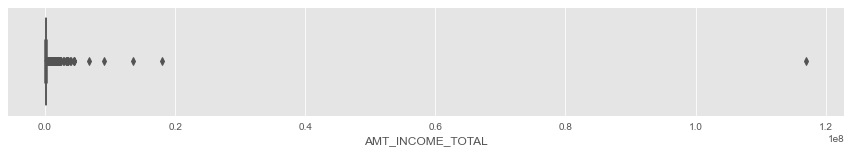

In [164]:
# Boxplot for 'AMT_INCOME_TOTAL' column to check the outliers

plt.figure(figsize=(15,2))
sns.boxplot(appdata5.AMT_INCOME_TOTAL)
plt.show()

In [69]:
df_incm_high = appdata5[appdata5.AMT_INCOME_TOTAL>20000000]
df_incm_high

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_BINS
12840,114967,1,Cash loans,Female,No,Yes,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,12615,922,6762,3643,1,1,0,1,0,0,Laborers,3,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,1.0,VERY_HIGH,MEDIUM,34,Young


There is only 1 datapoint at that high income range, might be an error by the applicant. we can check the column after filtering with a lower range like 1000000.

<AxesSubplot:xlabel='AMT_INCOME_TOTAL'>

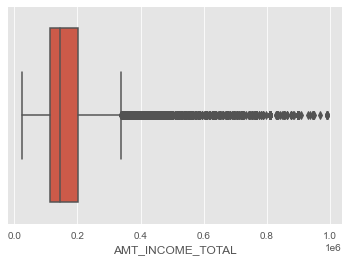

In [163]:
df_incm_low = appdata5[appdata5.AMT_INCOME_TOTAL<1000000]
sns.boxplot(df_incm_low.AMT_INCOME_TOTAL)

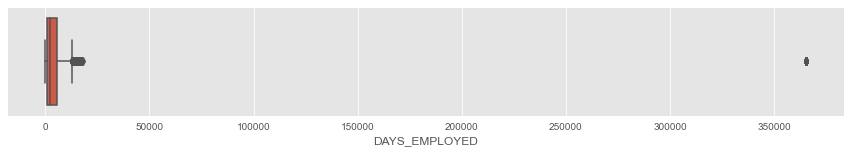

In [161]:
# Boxplot for 'DAYS_EMPLOYED' column to check the outliers 

plt.figure(figsize=(15,2))
sns.boxplot(appdata5.DAYS_EMPLOYED)
plt.show()

There are very few outliers in the DAYS_EMPLOYED column. Let's check this. 

In [73]:
df_daysemp = appdata5[appdata5.DAYS_EMPLOYED>350000]
df_daysemp

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_BINS
8,100011,0,Cash loans,Female,No,Yes,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,20099,365243,7427,3514,1,0,0,1,0,0,Other,2,2,2,WEDNESDAY,14,0,0,0,0,0,0,Not Working,0.205747,1,0,1.0,0.0,0,0,0.0,0.0,0.0,0.0,1.0,LOW,HIGH,55,Middle_Age
11,100015,0,Cash loans,Female,No,Yes,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,20417,365243,5246,2512,1,0,0,1,1,0,Other,2,2,2,FRIDAY,7,0,0,0,0,0,0,Not Working,0.555183,0,0,0.0,0.0,2396,0,0.0,0.0,0.0,0.0,2.0,VERY_LOW,VERY_LOW,55,Middle_Age
23,100027,0,Cash loans,Female,No,Yes,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,24827,365243,9012,3684,1,0,0,1,1,0,Other,2,3,3,FRIDAY,12,0,0,0,0,0,0,Not Working,0.624305,0,0,0.0,0.0,795,0,0.0,0.0,0.0,0.0,3.0,VERY_LOW,VERY_LOW,68,Senior_Citizen
38,100045,0,Cash loans,Female,No,Yes,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,23920,365243,9817,4969,1,0,0,1,1,0,Other,2,2,2,FRIDAY,11,0,0,0,0,0,0,Not Working,0.650765,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,2.0,VERY_LOW,VERY_LOW,65,Senior_Citizen
43,100050,0,Cash loans,Female,No,Yes,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,23548,365243,5745,4576,1,0,0,1,0,0,Other,1,2,2,WEDNESDAY,9,0,0,0,0,0,0,Not Working,0.766138,0,0,0.0,0.0,491,0,0.0,0.0,0.0,0.0,3.0,LOW,MEDIUM,64,Senior_Citizen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,Female,No,Yes,0,202500.000,703728.0,29943.0,607500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.031329,22414,365243,11976,4171,1,0,0,1,0,0,Other,1,2,2,MONDAY,15,0,0,0,0,0,0,Not Working,0.195625,11,2,11.0,0.0,1667,0,0.0,0.0,1.0,0.0,0.0,MEDIUM,MEDIUM,61,Senior_Citizen
307483,456227,0,Cash loans,Female,No,Yes,0,99000.000,247275.0,16479.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.007330,24911,365243,11211,4213,1,0,0,1,0,0,Other,1,2,2,MONDAY,12,0,0,0,0,0,0,Not Working,0.589906,1,1,1.0,1.0,1775,0,0.0,0.0,0.0,0.0,5.0,VERY_LOW,VERY_LOW,68,Senior_Citizen
307487,456231,0,Cash loans,Male,No,Yes,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,23125,365243,5485,4115,1,0,0,1,0,0,Other,2,2,2,WEDNESDAY,10,0,0,0,0,0,0,Not Working,0.307082,0,0,0.0,0.0,846,0,0.0,0.0,0.0,1.0,8.0,LOW,HIGH,63,Senior_Citizen
307505,456249,0,Cash loans,Female,No,Yes,0,112500.000,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Se

On closer inspection we found out that some pensioners have entered value 365243. Normally, pensioners are elderly people, who started their careers long ago, and if they were employed in a single organization for their whole life, then normally that value would be quite high. Since they all entered the same value, seems that is an upper limit value given by the bank, if the days employed exceeded a threshold.

## Data Imbalance

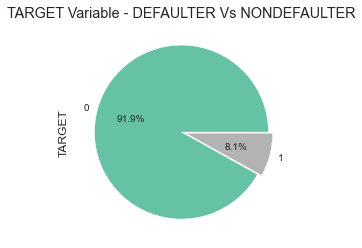

In [192]:
sns.set_style('dark')
plt.title('TARGET Variable - DEFAULTER Vs NONDEFAULTER')
appdata5["TARGET"].value_counts(normalize=True).mul(100).plot.pie(explode=(0,0.05), autopct='%1.1f%%', cmap='Set2')
plt.show()

There are about 92% applicants who did not have any difficulty in payment. Only about 8% applicants had difficulty in payment. Let us divide the dataset based on this TARGET variable and analyse further. 

In [75]:
# Dividing the original dataset into two different datasets depending upon the TARGET value 

df_tg0 = appdata5.loc[appdata5.TARGET == 0]
df_tg1 = appdata5.loc[appdata5.TARGET == 1]

# Univariate analysis of categorical variables

In [194]:
# Defining a function to plot for categorical variables
# Color palettes used - RdGnBu, Paired, Set2

def plotfunc(var):

    sns.set_style('darkgrid')
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))

    sns.countplot(x=var, data=df_tg0, ax=ax1, order = df_tg0[var].value_counts().index, palette = "Paired")
    ax1.set_ylabel('Count of Non-Defaulters', fontsize=15)
    ax1.set_title(f'Plotting '+ '%s' %var +' for people with no payment difficulty', fontsize=14)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right", fontsize=15)
    ax1.set_xlabel(var, fontsize=14)
    for a in ax1.patches:
        ax1.annotate('{:.2f}%'.format((a.get_height()/len(df_tg0))*100), (a.get_x()+0.1, a.get_height()+40), fontsize=15)

    sns.countplot(x=var, data=df_tg1,ax=ax2, order = df_tg1[var].value_counts().index, palette = "Paired")
    ax2.set_ylabel('Count of Defaulters', fontsize=15)
    ax2.set_title(f'Plotting '+ '%s' %var +' for people with payment difficulty', fontsize=14)   
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right", fontsize=15)
    ax2.set_xlabel(var, fontsize=14)
    for a in ax2.patches:
        ax2.annotate('{:.2f}%'.format((a.get_height()/len(df_tg1))*100), (a.get_x()+0.1, a.get_height()+40), fontsize=15)


    plt.show()

# Plotting Unordered Categorical Variables

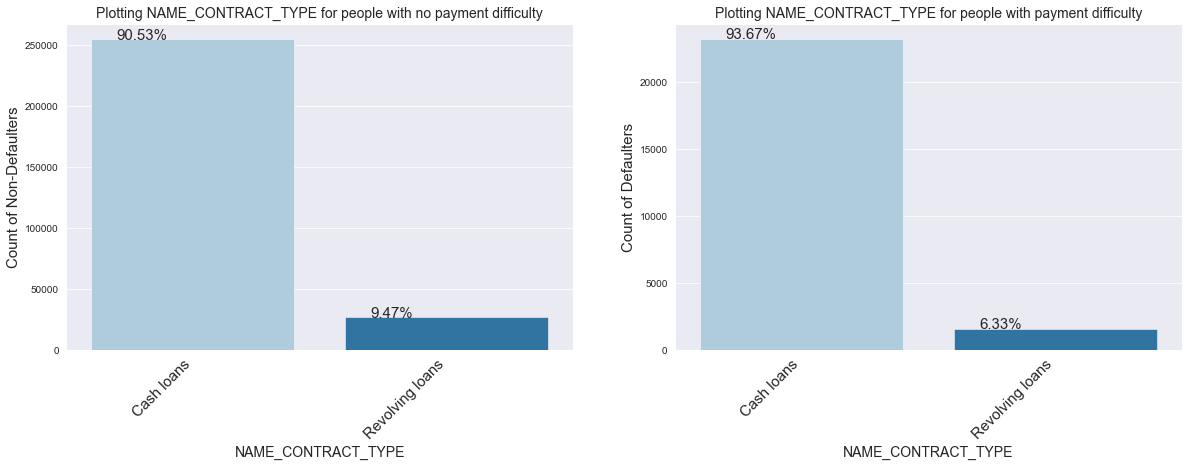

In [195]:
plotfunc('NAME_CONTRACT_TYPE')

Observation: Defaulters tend to take cash loan slightly higher in percentage than non-defaulters. Subsequently, non-defaulters have a slightly higher rate of revolving loans than defaulters. 

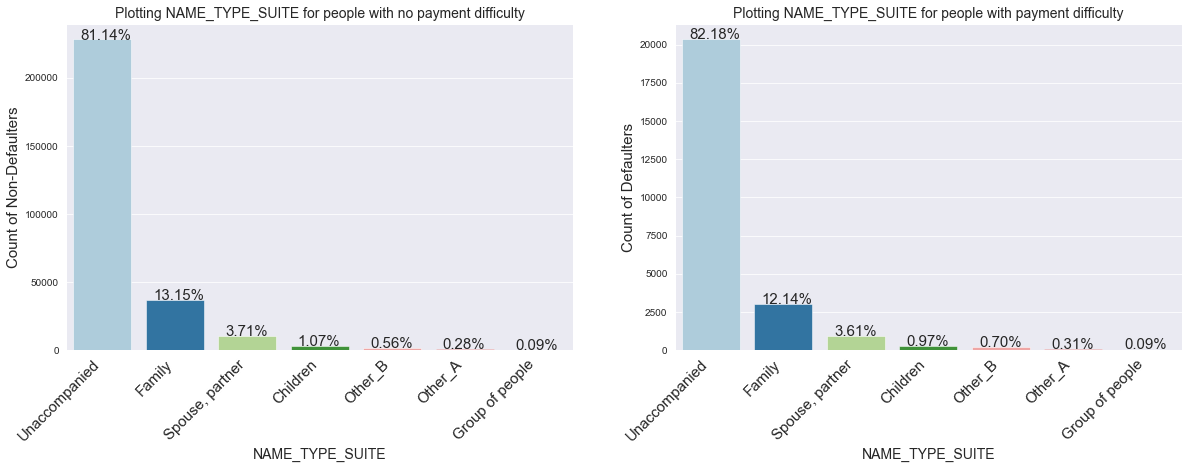

In [199]:
plotfunc('NAME_TYPE_SUITE')

Observation:
Though both categories show almost similar traits, still there are some observations: 

1. Defaulters are unaccompanied by slightly higher margin that Non-defaulters. 
2. Defaulters are accompanied by other category people by a slightly higher margin. 
3. Non-defaulters are accompanied by their Family, Spouse/Partner, Children by a slightly higher margin. 

With these we can infer that non-defaulters are mostly family oriented persons, or they involve their family with banking related work. They are reliable a category. On the other hand, those who are accompanied by other people (like friends, associates), or unaccompanied, tend to be fraudulent. They try to keep their family out of the liability. Banks need to keep this in mind. 

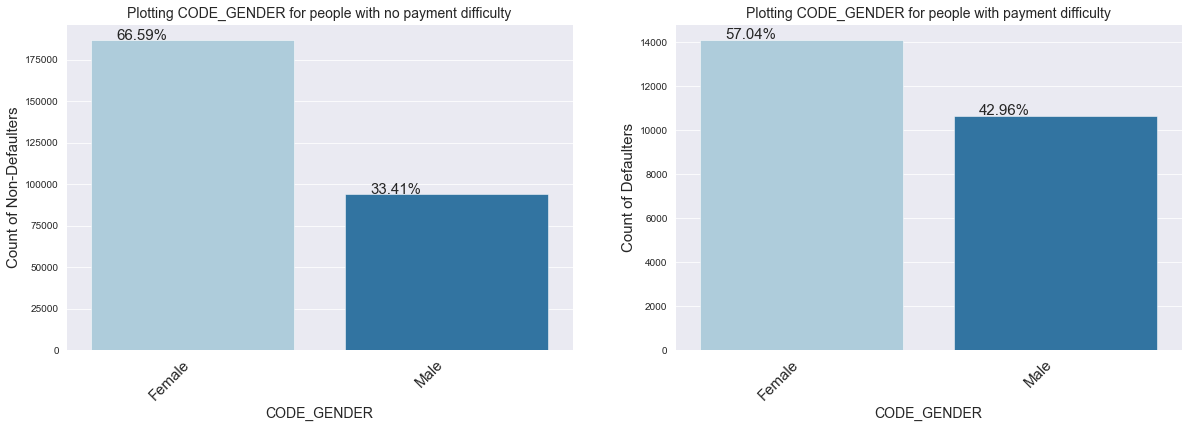

In [200]:
plotfunc('CODE_GENDER')

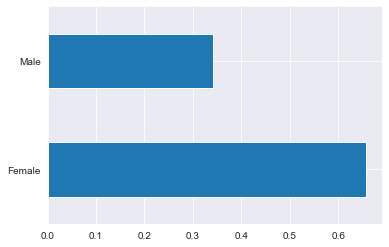

In [80]:
appdata5["CODE_GENDER"].value_counts(normalize=True).plot.barh();

Observations:
Though the overall data is slightly imbalanced in the ratio; Male:Female = 35:65 (approx), we have the following observations: 
1. Female customers faced less of a difficulty in payments earlier, hence tend to be non-defaulters. 
2. Male applicants faced difficulty comparatively higher, hence tend to be defaulters. 

Bank should conside the fact that female applicants are more reliable for loan sanction.

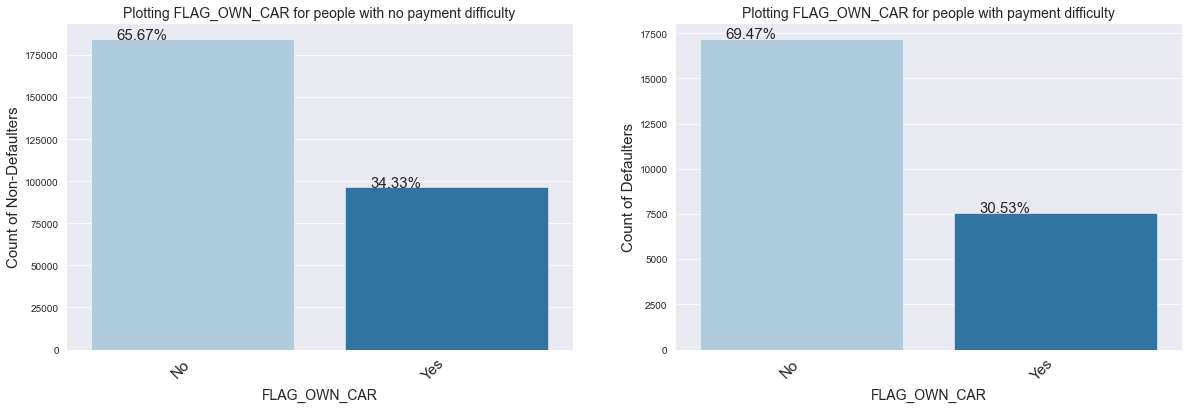

In [201]:
plotfunc('FLAG_OWN_CAR')

Observations: 
Applicants tend to be defaulters more if they do not own a car. Assuming a person having a steady enough income to maintain a car can pay their loans on time, tends to be non-defaulter. 

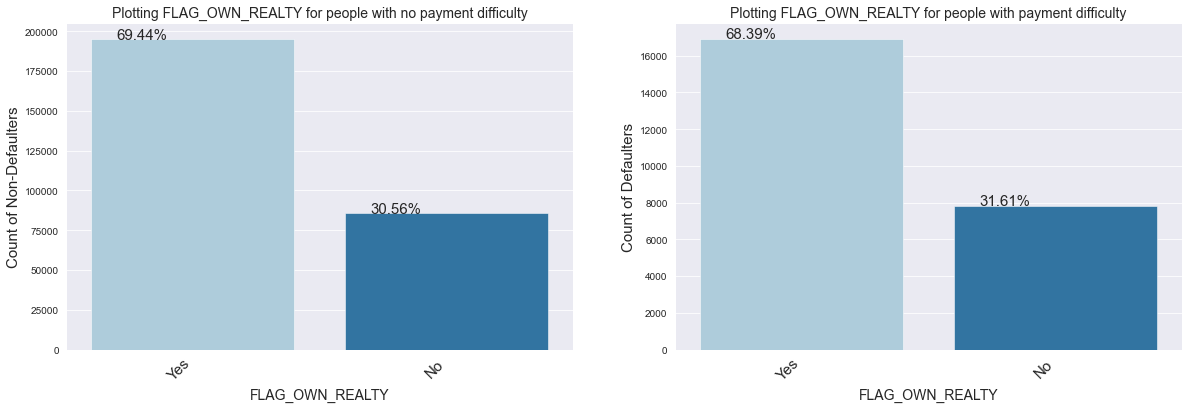

In [202]:
plotfunc('FLAG_OWN_REALTY')

Observations: 
    Applicants tend to be defaulters more if they do not own realty(property). If a person owns a property, they tend to be a non-defaulter. 

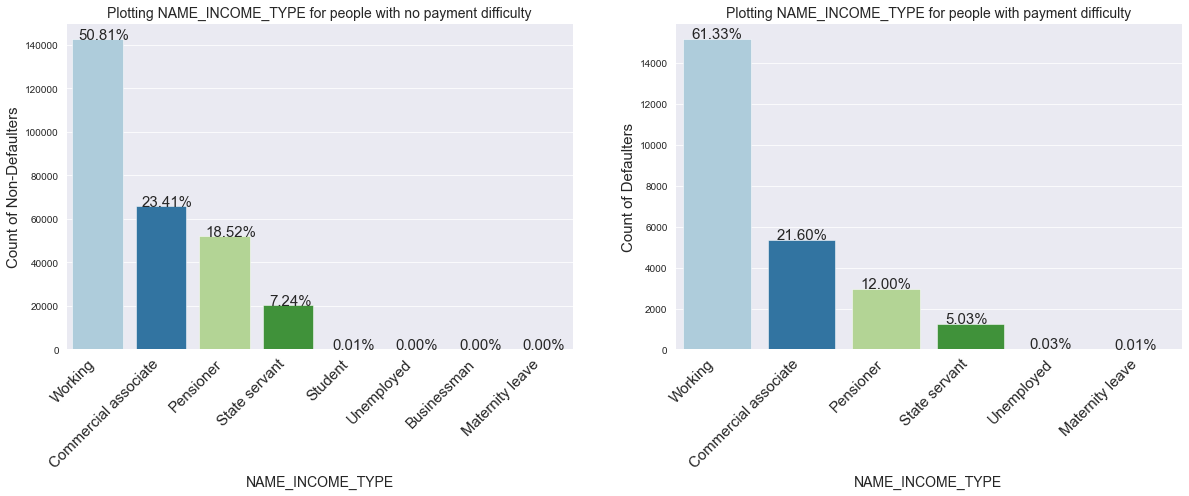

In [203]:
plotfunc('NAME_INCOME_TYPE')

Observation:
1. Pensioners are likely to be Non-defaulters. Since they are elderly people and have worked in some organization for long time, they have a sense of responsibility. 
2. State-servants are also less likely to be defaulters. 
3. Students are not at all in the defaulters class. Students pay their education loan on time. Students who apply for laon, are in need of money for their education, they have a sense of gratitude, hence are reliable. 
4. Businessmen are not at all in defaulters list, hence are reliable potential applicants. 
5. Females who are in maternity leave, and those who are unemployed might face income loss, hence can be defaulters. 
6. Working category has comparatively higher percentage in Defaulters list. Let's look into it further.

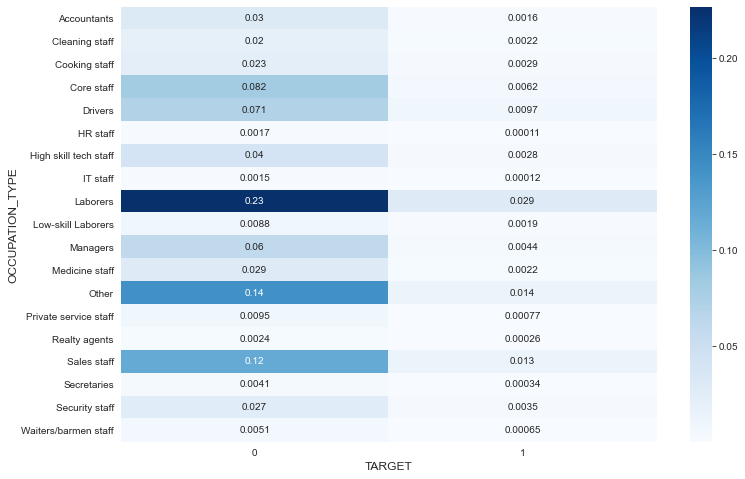

In [314]:
df_working = appdata5[appdata5.NAME_INCOME_TYPE=='Working']
df_w=pd.crosstab(index=df_working.OCCUPATION_TYPE, columns = df_working.TARGET, dropna=True, normalize=True)
#print(df_w)
plt.figure(figsize=(12,8))
sns.heatmap(df_w, cmap='Blues', annot=True);

Observation: Within Working category, 'Laborers' occupation type has little higher tendency of defaulting. 

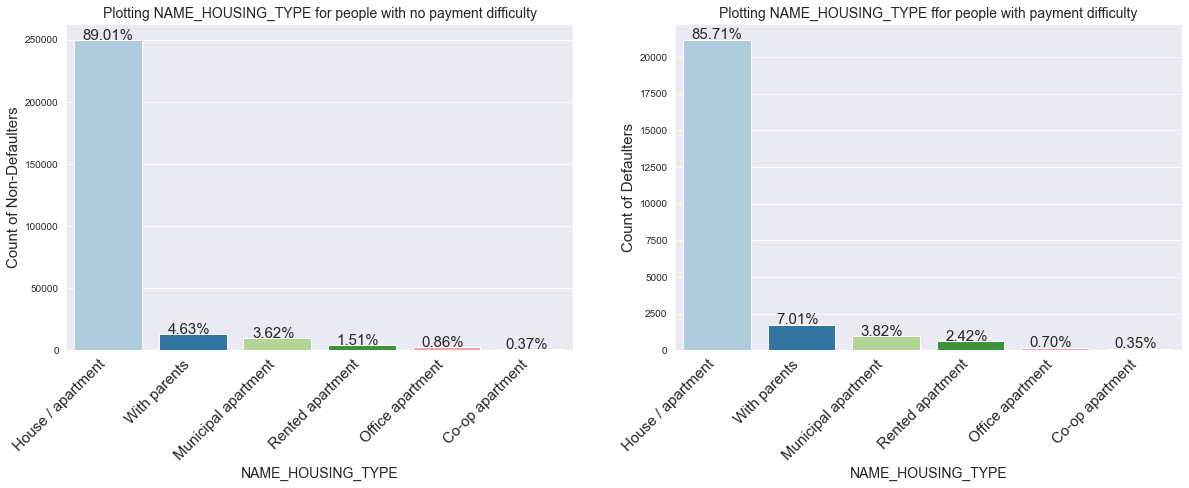

In [84]:
plotfunc('NAME_HOUSING_TYPE')

Observation:
1. People stayng in own house/apartment are tend to be more non-defaulters.
2. People stayng in office apartment or co-op aapartment, means they work in some office, they are tend to be more non-defaulters.
3. People staying in rented appartment, means they do not have good income or not steady income, they tend to default more. 

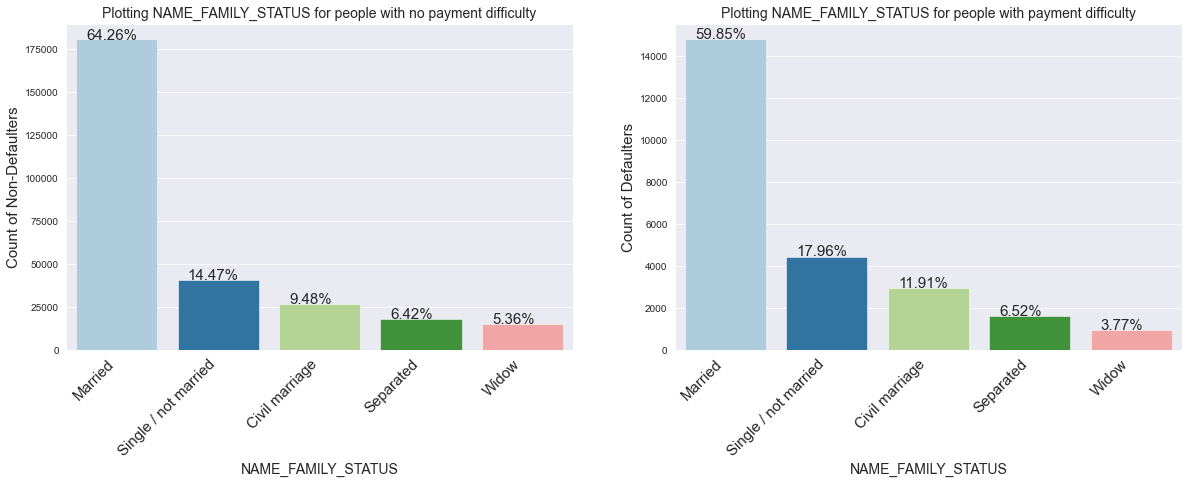

In [204]:
plotfunc('NAME_FAMILY_STATUS')

Observations:
1. People who are married tend to be non-defaulter more. 
2. Widow (means females) are less defaulters, which is observed from our plot of CODE_GENDER as well
3. Single people, separated or under civil marriage, are tend to be defaulters. 

# Plotting Ordered Categorical Variables

In [243]:
# Defining a function to plot for categorical variables
def plot_ord_func(var, order):

    sns.set_style('darkgrid')
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=df_tg0, ax=ax1, order = order, palette = "Dark2")
    ax1.set_ylabel('Count of Non-Defaulters', fontsize=15)
    ax1.set_title(f'Plot of '+ '%s' %var +' for people with no payment difficulty', fontsize=14)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right", fontsize=15)
    ax1.set_xlabel(var, fontsize=14)
    for a in ax1.patches:
        ax1.annotate('{:.2f}%'.format((a.get_height()/len(df_tg0))*100), (a.get_x()+0.1, a.get_height()+40), fontsize=15)
        
    sns.countplot(x=var, data=df_tg1,ax=ax2, order = order, palette = "Dark2")
    ax2.set_ylabel('Count of for Defaulters', fontsize=15)
    ax2.set_title(f'Plot of '+ '%s' %var +' for people with payment difficulty', fontsize=14)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right", fontsize=15)
    ax2.set_xlabel(var, fontsize=14)
    for a in ax2.patches:
        ax2.annotate('{:.2f}%'.format((a.get_height()/len(df_tg1))*100), (a.get_x()+0.1, a.get_height()+40), fontsize=15)
    
    
    plt.show()
    

In [87]:
# Let's check the NAME_EDUCATION_TYPE column

appdata5.NAME_EDUCATION_TYPE.unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

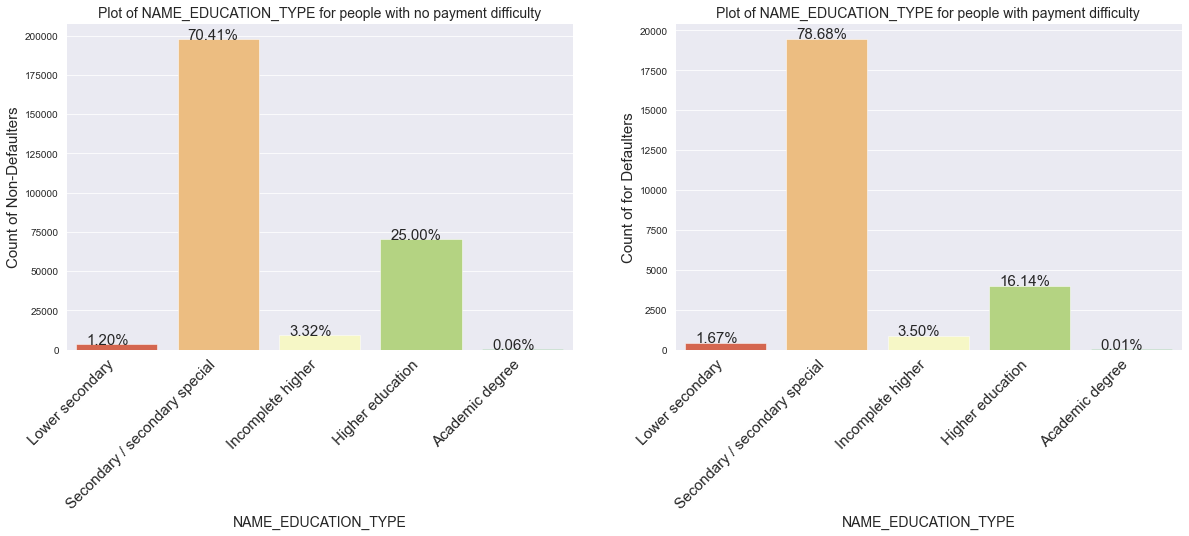

In [219]:
order = ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']
plot_ord_func('NAME_EDUCATION_TYPE', order)

Observations:
1. People having Higher educaion and Academic degree (meaning well qualified) tend to be defaulters less
2. People with lower education level tend to be defaulters  more. 

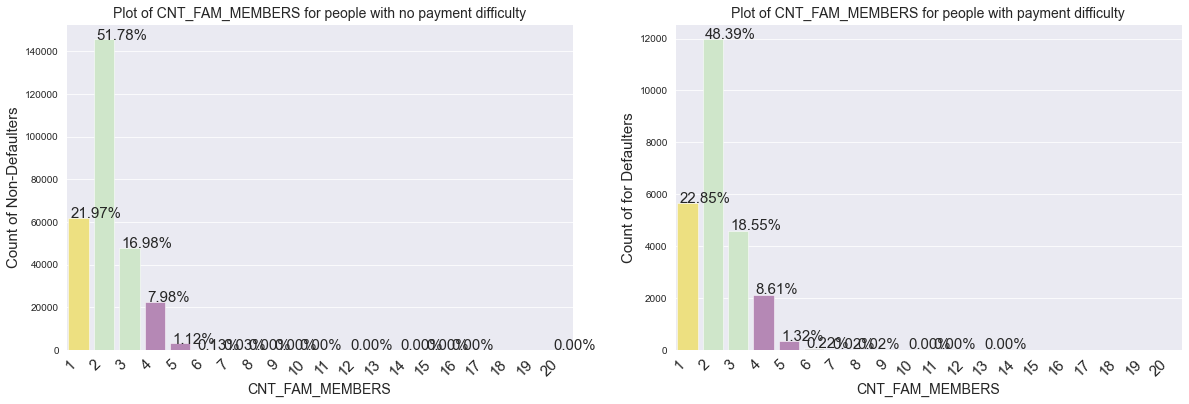

In [228]:
fam_order = range(appdata5.CNT_FAM_MEMBERS.min(), appdata5.CNT_FAM_MEMBERS.max()+1)
plot_ord_func('CNT_FAM_MEMBERS', fam_order)

Observation: There are very slight differences in the percentage values of number of family members in each target category. However, nothing specific could be inferred from this plot, this could be simply randomly distributed or it could mean that the number of family members has no visible effect on the loan-repaying capabilities of a customer. 

In [90]:
# Let's check for the variable AMT_INCOME_RANGE

appdata5.AMT_INCOME_RANGE.unique()

['MEDIUM', 'HIGH', 'VERY_LOW', 'LOW', 'VERY_HIGH']
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

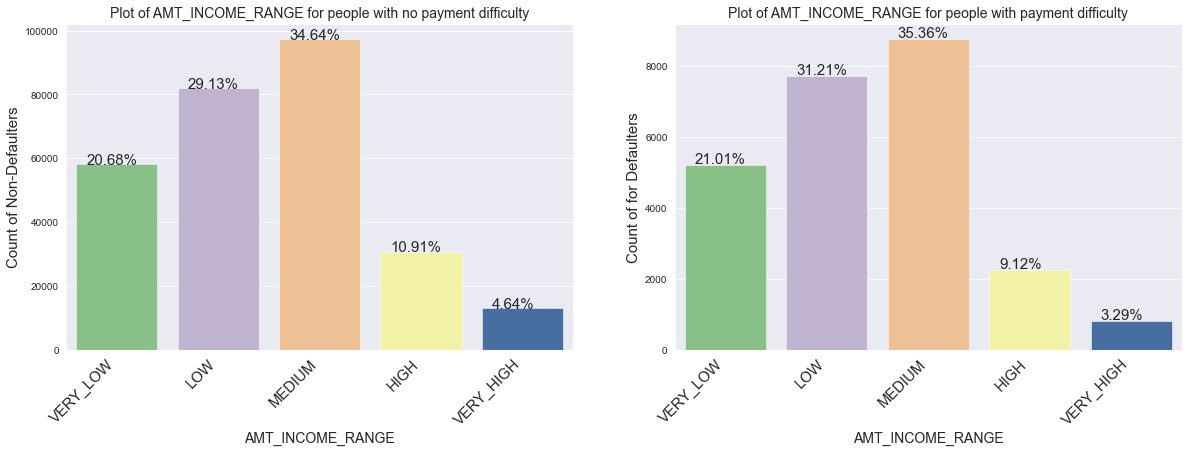

In [234]:
order = ['VERY_LOW' , 'LOW' , 'MEDIUM' , 'HIGH' , 'VERY_HIGH']
plot_ord_func('AMT_INCOME_RANGE', order)

Observations:
1. People with income bracket in VERY_LOW, LOW and MEDIUM are higher in percentage of facing difficulty, and hence tend to detault. 
2. People in HIGH and VERY_HIGH income range are less likely to default. 

In [92]:
appdata5.AGE_BINS.unique()

['Very_Young', 'Middle_Age', 'Young', 'Senior_Citizen']
Categories (4, object): ['Very_Young' < 'Young' < 'Middle_Age' < 'Senior_Citizen']

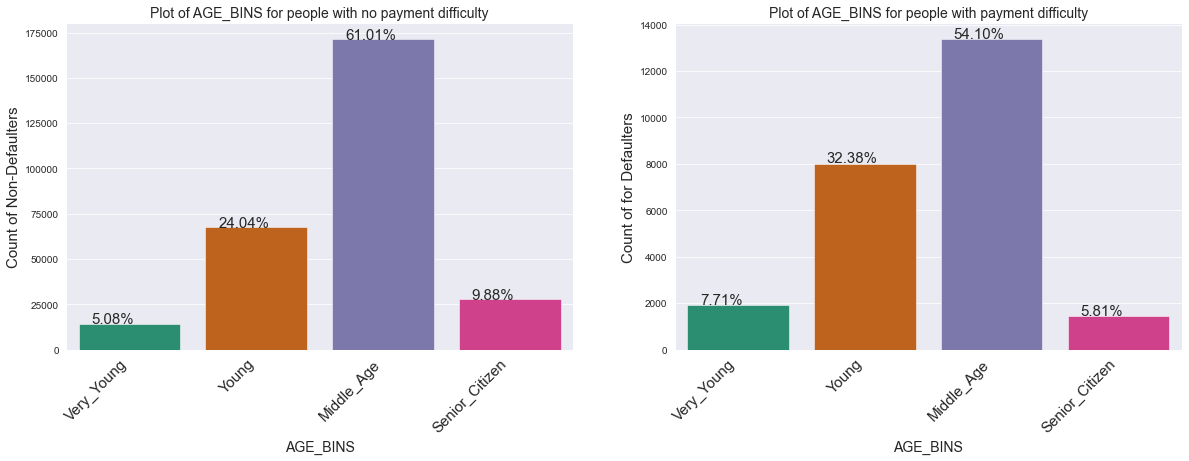

In [244]:
age_order = ['Very_Young' , 'Young' , 'Middle_Age' , 'Senior_Citizen']
plot_ord_func('AGE_BINS', age_order)

Observations:
1. Very young and young applicants tend to default on their payment. 
2. Middle age and senior citizen are less likely to be defaulters.

# Bivariate analysis of numerical variables

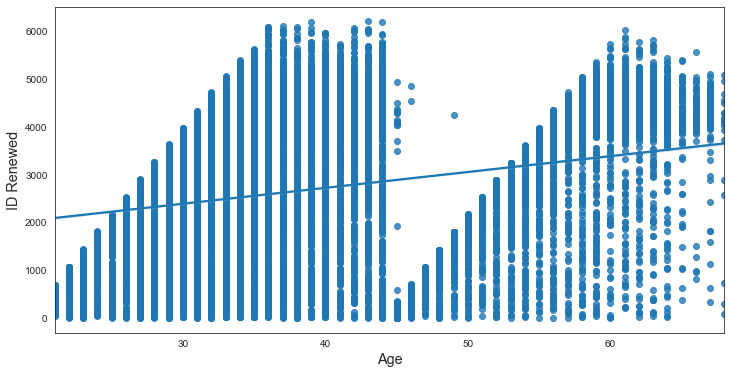

In [96]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.regplot(df_tg1.AGE, df_tg1.DAYS_ID_PUBLISH)
plt.xlabel("Age", fontsize='x-large')
plt.ylabel("ID Renewed", fontsize='x-large')
plt.show()

Observations: 
1. We can see the regression line is upwards, which is justified. As age increases, more days (years) are lapsed from the change/issuance of ID proof to the day of application. However, the point to observe here is that, the scatter lines are dense in lower ages (less than 45) and becoming sparse in upper ages. Scatter dots are quite dense towards the 0 days till age 50. 
2. Till age 44, the days range grows normally. At age 45, the days range suddenly drops down to around 0-50 days (only very few are in upper range). At that age people sometime change their job, occupation, venture for new business, buy or move to new house in new city, hence may need to renew their ID proof. However, the ID proofs which are renewed recently might be suspicious that the bank should keep in mind. 

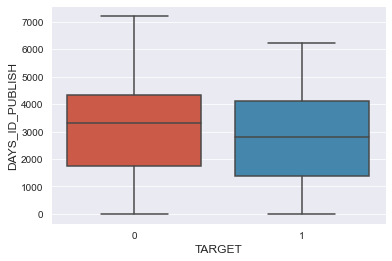

In [316]:
sns.boxplot(x='TARGET', y='DAYS_ID_PUBLISH', data=appdata5);

DAYS_ID_PUBLISH is lower for defaulters. 

 Let us look in to the four numeric columns - 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'. 

Since AMT_INCOME_TOTAL had an outlier, we may need to remove that to get proper idea of the relations, otherwise we may not be able to see any relation between Total income and other variables.

<Figure size 1800x864 with 0 Axes>

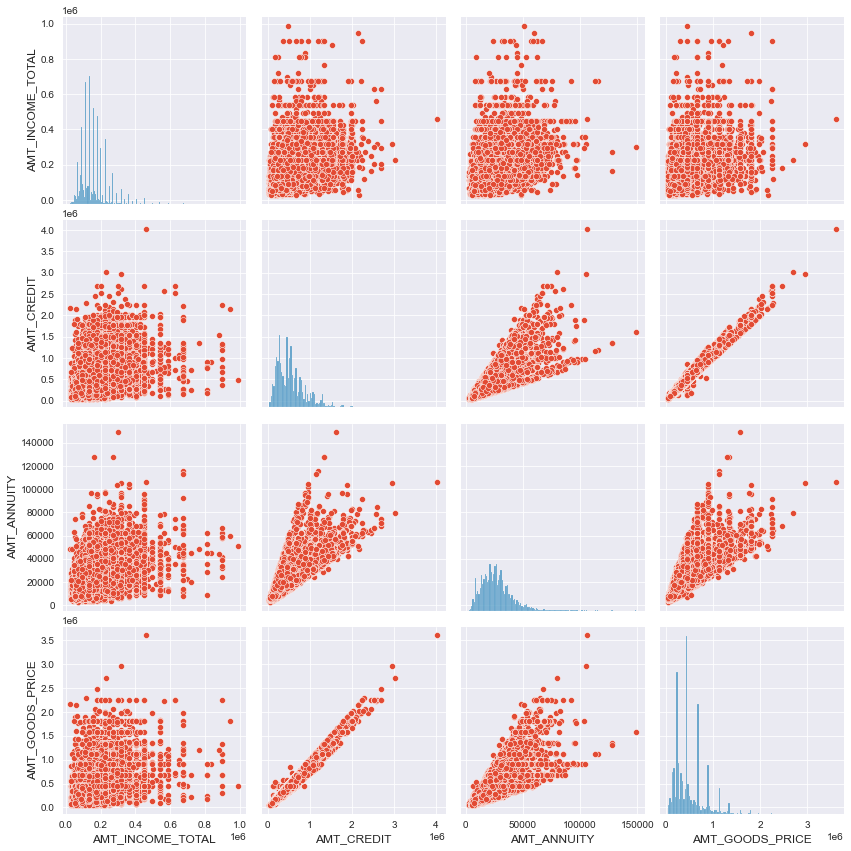

In [248]:
plt.figure(figsize=(25,12))
df_incm_tg1 = appdata5[(appdata5.AMT_INCOME_TOTAL<1000000)&(appdata5.TARGET==1)]
sns.pairplot(df_incm_tg1, vars=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'], palette='RdBu', size=3);

Observations: on the partition of tha data where Target=1
1. Amount of Credit, Annuity or Goods price vary with the Total income. Other three variables increase as Total income increases.

2. Amount of Credit increases as Amount of Annuity increases or vide versa. So, banks tend to approve higher credit loan to an appliant who has higher annuity on previous application.

3. Amount of Credit is almost linearly proportional to Amount of goods price, which is obvious as, people will ask for as much loan as the price of the goods that he wishes to purchase with the loan. 
 

In [98]:
#pd.pivot_table(appdata5, index = 'TARGET', columns =['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AGE_BINS'], values = 'EXT_SOURCE_2', aggfunc=np.mean)
df_grp0 = df_tg0.groupby('OCCUPATION_TYPE')[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].mean()
df_grp1 = df_tg1.groupby('OCCUPATION_TYPE')[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].mean()

df_grp0_norm = df_grp0.apply(lambda x: round((x/max(x)*100),3))
df_grp1_norm = df_grp1.apply(lambda x: round((x/max(x)*100),3))

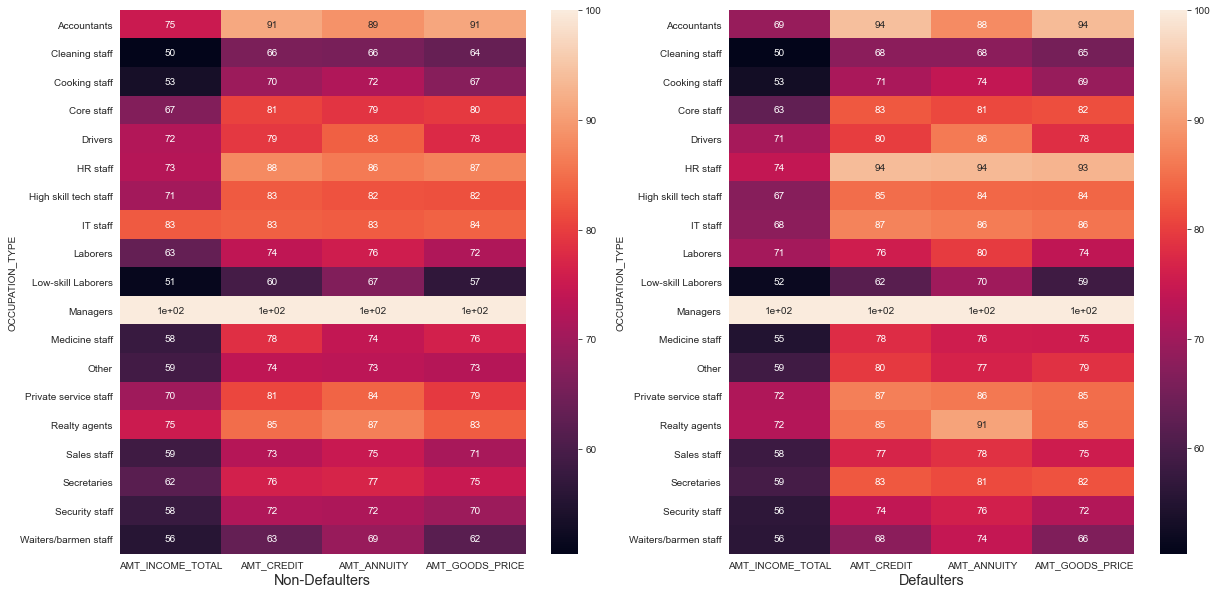

In [99]:
plt.figure(figsize=[20,10])
plt.xticks(rotation=90)

plt.subplot(1,2,1)
sns.heatmap(df_grp0_norm, annot=True)
plt.xlabel('Non-Defaulters',fontsize='x-large')

plt.subplot(1,2,2)
sns.heatmap(df_grp1_norm, annot=True)
plt.xlabel('Defaulters',fontsize='x-large')

plt.show()

Observations: 
1. Managers have high income range as well as high amount of credit requirement, in both defaulters and non-defaulters list. 
2. In Defaulters list, HR Staff and Accountants have comparatively lower income range than their credit requirement, which is an indicator of them being defaulter. 

Finally Let's check the correlation between the numeric variables, for both deafaulter and Non-defaulter categories. 

In [100]:
cols_num=list(df_tg0.select_dtypes('int64').columns) + list(df_tg0.select_dtypes('float64').columns)


In [101]:
df_tg0_num=df_tg0[cols_num]
tg0_corr = df_tg0_num.corr()
#round(tg0_corr, 3)
list_corr0 = tg0_corr.unstack().sort_values(ascending=False).drop_duplicates()
df_tg0_corr = pd.DataFrame(list_corr0)
df_tg0_corr = df_tg0_corr.reset_index().rename(columns = {'level_0':'Column 1', 'level_1':'Column 2', 0:'Correlation'})
df_tg0_corr = df_tg0_corr[df_tg0_corr['Column 1'] != df_tg0_corr['Column 2']]
df_tg0_corr.head(10)
# The top10 correlation from the Non-Defaulter (Target=0) dataframe
#Also removed the correlations between the same columns

,Column 1,Column 2,Correlation
1,AMT_CREDIT,AMT_GOODS_PRICE,0.987024
2,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.949978
3,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861653
4,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,0.830417
5,AMT_ANNUITY,AMT_GOODS_PRICE,0.775594
6,AMT_ANNUITY,AMT_CREDIT,0.770566
7,DAYS_EMPLOYED,DAYS_BIRTH,0.626291
8,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,0.446934
9,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,0.435622
10,AMT_INCOME_TOTAL,AMT_ANNUITY,0.418265


In [102]:
df_tg1_num=df_tg1[cols_num]
tg1_corr = df_tg1_num.corr()
#round(tg1_corr, 3)
list_corr1 = tg1_corr.unstack().sort_values(ascending=False).drop_duplicates()
df_tg1_corr = pd.DataFrame(list_corr1)
df_tg1_corr = df_tg1_corr.reset_index().rename(columns = {'level_0':'Column 1', 'level_1':'Column 2', 0:'Correlation'})
df_tg1_corr = df_tg1_corr[df_tg1_corr['Column 1'] != df_tg1_corr['Column 2']]
df_tg1_corr.head(10)

# The top10 correlation from the Defaulter (Target=1) dataframe
#Also removed the correlations between the same columns


,Column 1,Column 2,Correlation
1,AMT_CREDIT,AMT_GOODS_PRICE,0.982775
2,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.956560
3,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.847846
4,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778572
5,AMT_ANNUITY,AMT_GOODS_PRICE,0.751912
6,AMT_ANNUITY,AMT_CREDIT,0.751707
7,DAYS_EMPLOYED,DAYS_BIRTH,0.582614
8,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.497256
9,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.472086
10,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,0.322170


In [4]:
!pip install jovian --upgrade

## Now Let's check the Previous Application data file. 

In [104]:
# Reading the 'previous_application.csv' file

prevapp = pd.read_csv('previous_application.csv')

In [105]:
prevapp.head(50)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# Checking the shape of the dataframe 

prevapp.shape

(1670214, 37)

In [107]:
# Checking the info of the dataframe

prevapp.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [108]:
# Checking for percentage of null values in the dataframe

#round(100*(prevapp.isnull().sum() / len(prevapp.index)),2)
prevapp.isnull().sum()/len(prevapp)*100 

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [109]:
prevapp2 = prevapp.drop(prevapp.columns[prevapp.isnull().mean() >= 0.50], axis = 1)
print('Dimension of the original dataset ',prevapp.shape)
print('Dimension of the dataset after removing the missing values',prevapp2.shape)

Dimension of the original dataset  (1670214, 37)
Dimension of the dataset after removing the missing values (1670214, 33)


In [110]:
prevapp2.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [111]:
prevapp2.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64

In [112]:
prevapp2=prevapp2[prevapp2.NAME_CONTRACT_TYPE != 'XNA']

In [113]:
prevapp2.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [114]:
prevapp2.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True)

Y    0.994925
N    0.005075
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [115]:
prevapp2.NFLAG_LAST_APPL_IN_DAY.value_counts(normalize=True)

1    0.996467
0    0.003533
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64

In [116]:
prevapp2.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

XAP                                 0.552328
XNA                                 0.405971
Repairs                             0.014232
Other                               0.009347
Urgent needs                        0.005038
Buying a used car                   0.001729
Building a house or an annex        0.001613
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000449
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

Since XAP and XNA are high in numbers, cannot remove the rows, so we can rename them to 'Unknown' 

In [117]:
prevapp2.NAME_CASH_LOAN_PURPOSE = prevapp2.NAME_CASH_LOAN_PURPOSE.apply(lambda x: 'Unknown' if (x=='XNA' or x=='XAP') else x)


In [118]:
prevapp2.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)*100

Unknown                             95.829910
Repairs                              1.423166
Other                                0.934685
Urgent needs                         0.503752
Buying a used car                    0.172948
Building a house or an annex         0.161270
Everyday expenses                    0.144682
Medicine                             0.130190
Payments on other loans              0.115638
Education                            0.094199
Journey                              0.074197
Purchase of electronic equipment     0.063538
Buying a new car                     0.060604
Wedding / gift / holiday             0.057609
Buying a home                        0.051801
Car repairs                          0.047728
Furniture                            0.044854
Buying a holiday home / land         0.031919
Business development                 0.025511
Gasification / water supply          0.017965
Buying a garage                      0.008144
Hobby                             

In [119]:
prevapp2.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.620876
Canceled        0.189239
Refused         0.174054
Unused offer    0.015831
Name: NAME_CONTRACT_STATUS, dtype: float64

In [120]:
prevapp2.NAME_CLIENT_TYPE.value_counts(normalize=True)

Repeater     0.737160
New          0.180459
Refreshed    0.081219
XNA          0.001162
Name: NAME_CLIENT_TYPE, dtype: float64

In [121]:
prevapp2=prevapp2[prevapp2.NAME_CLIENT_TYPE != 'XNA']

In [122]:
# verifying

prevapp2.NAME_CLIENT_TYPE.value_counts(normalize=True)

Repeater     0.738018
New          0.180669
Refreshed    0.081314
Name: NAME_CLIENT_TYPE, dtype: float64

In [123]:
prevapp2.NAME_PAYMENT_TYPE.value_counts(normalize=True)

Cash through the bank                        0.619248
XNA                                          0.375192
Non-cash from your account                   0.004909
Cashless from the account of the employer    0.000651
Name: NAME_PAYMENT_TYPE, dtype: float64

In [124]:
prevapp2.NAME_PAYMENT_TYPE = prevapp2.NAME_PAYMENT_TYPE.apply(lambda x: 'Unspecified' if x=='XNA' else x)


In [125]:
# verifying

prevapp2.NAME_PAYMENT_TYPE.value_counts(normalize=True)

Cash through the bank                        0.619248
Unspecified                                  0.375192
Non-cash from your account                   0.004909
Cashless from the account of the employer    0.000651
Name: NAME_PAYMENT_TYPE, dtype: float64

In [126]:
prevapp2.NAME_GOODS_CATEGORY.value_counts(normalize=True).mul(100)

XNA                         56.898653
Mobile                      13.462819
Consumer Electronics         7.284432
Computers                    6.336788
Audio/Video                  5.958055
Furniture                    3.214289
Photo / Cinema Equipment     1.499526
Construction Materials       1.497188
Clothing and Accessories     1.410853
Auto Accessories             0.442166
Jewelry                      0.376335
Homewares                    0.300972
Medical Supplies             0.230346
Vehicles                     0.201987
Sport and Leisure            0.178665
Gardening                    0.159959
Other                        0.153124
Office Appliances            0.139874
Tourism                      0.099465
Medicine                     0.092810
Direct Sales                 0.026500
Fitness                      0.012531
Additional Service           0.007674
Education                    0.006415
Weapon                       0.004617
Insurance                    0.003837
Animals     

In [127]:
prevapp2.NAME_GOODS_CATEGORY = prevapp2.NAME_GOODS_CATEGORY.apply(lambda x: 'Unspecified' if x=='XNA' else x)

In [128]:
df_amt = prevapp2[['NAME_CONTRACT_STATUS', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']]

In [129]:
round(df_amt.describe(), 3)

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE
count,1297078.000,1667927.000,1667926.000,1283763.000
mean,15953.975,175310.938,196206.954,227801.371
std,14782.370,292812.703,318607.524,315371.274
min,0.000,0.000,0.000,0.000
25%,6321.375,18855.000,24250.500,50832.225
50%,11250.000,71100.000,80626.500,112284.000
75%,20655.394,180555.750,216441.000,234000.000
max,418058.145,6905160.000,6905160.000,6905160.000


Observations:
1. The max application amount was 6905160 was applied to purchase goods, and it is showing in Credit amount also. We may need to investigate this later.
2. The min application amount was 0 and Credit amount is also showing 0. May need to further investigate whether it was approved or rejected. 
3. Mean and Median of Credit amount are higher than that of Application amount in previous application data. This could be an indicator that bank may face loss. Need to analyze further. 

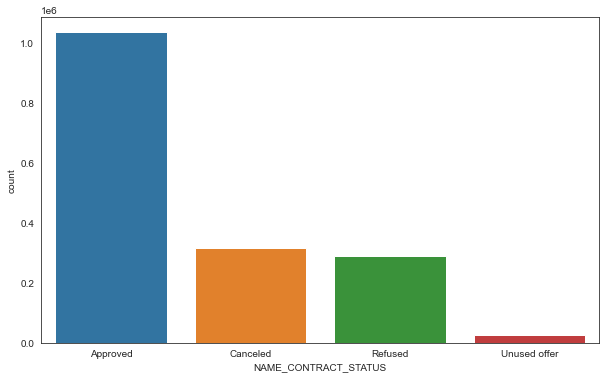

In [130]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_amt, x='NAME_CONTRACT_STATUS', order = df_amt['NAME_CONTRACT_STATUS'].value_counts().index);

Observation: 
1. Most of the previous applications were approved. 
2. Second is the number of cancelled applications. Almost similar is the count of Refused applications. 

In [131]:
#prevapp2.corr()

prev_corr = prevapp2.corr()
#round(prev_corr, 3)
list_corr = prev_corr.unstack().sort_values(ascending=False).drop_duplicates()
df_corr = pd.DataFrame(list_corr)
df_corr = df_corr.reset_index().rename(columns = {'level_0':'Column 1', 'level_1':'Column 2', 0:'Correlation'})
df_corr = df_corr[df_corr['Column 1'] != df_corr['Column 2']]
df_corr.head(10)

,Column 1,Column 2,Correlation
1,AMT_APPLICATION,AMT_GOODS_PRICE,0.999884
2,AMT_CREDIT,AMT_GOODS_PRICE,0.993088
3,AMT_APPLICATION,AMT_CREDIT,0.975803
4,DAYS_LAST_DUE,DAYS_TERMINATION,0.927904
5,AMT_ANNUITY,AMT_GOODS_PRICE,0.820903
6,AMT_ANNUITY,AMT_CREDIT,0.816441
7,AMT_ANNUITY,AMT_APPLICATION,0.808872
8,AMT_APPLICATION,CNT_PAYMENT,0.680615
9,AMT_CREDIT,CNT_PAYMENT,0.674225
10,AMT_GOODS_PRICE,CNT_PAYMENT,0.672111


In [132]:
prevapp2.SK_ID_CURR.nunique()

338813

In [133]:
appdata5.shape

(305828, 56)

In [134]:
common_cols = appdata5.columns.intersection(prevapp2.columns)
common_cols

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START'],
      dtype='object')

In [170]:
prevapp3 = prevapp2.copy(deep=True)

In [171]:
prevapp3.rename(columns = {'NAME_CONTRACT_TYPE':'PREV_NAME_CONTRACT_TYPE', 
                           'AMT_CREDIT': 'PREV_AMT_CREDIT', 
                           'AMT_ANNUITY':'PREV_AMT_ANNUITY',
                            'AMT_GOODS_PRICE':'PREV_AMT_GOODS_PRICE',
                            'NAME_TYPE_SUITE':'PREV_NAME_TYPE_SUITE',
                            'WEEKDAY_APPR_PROCESS_START':'PREV_WEEKDAY_APPR_PROCESS_START',
                            'HOUR_APPR_PROCESS_START': 'PREV_HOUR_APPR_PROCESS_START'}, inplace=True)

In [172]:
prevapp3.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'PREV_NAME_CONTRACT_TYPE',
       'PREV_AMT_ANNUITY', 'AMT_APPLICATION', 'PREV_AMT_CREDIT',
       'AMT_DOWN_PAYMENT', 'PREV_AMT_GOODS_PRICE',
       'PREV_WEEKDAY_APPR_PROCESS_START', 'PREV_HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'PREV_NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [174]:
prevapp3.DAYS_TERMINATION.value_counts(normalize=True)

 365243.0    0.232769
-9.0         0.000909
-15.0        0.000909
-144.0       0.000905
-17.0        0.000901
               ...   
-2733.0      0.000004
-2754.0      0.000004
-2774.0      0.000004
-2768.0      0.000004
-2790.0      0.000004
Name: DAYS_TERMINATION, Length: 2785, dtype: float64

In [176]:
# Replacing the above value by NAN as it is not the right date value, as we discussed earler, it seems an upper limit value

prevapp3.DAYS_TERMINATION.replace({365243.0 : np.NaN}, inplace=True)
prevapp3.DAYS_TERMINATION[prevapp3.DAYS_TERMINATION > 0].value_counts()

Series([], Name: DAYS_TERMINATION, dtype: int64)

In [137]:
df_merged = pd.merge(appdata5, prevapp3, on="SK_ID_CURR", how="left")

In [138]:
df_merged.shape

(1422984, 88)

In [139]:
df_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_BINS,SK_ID_PREV,PREV_NAME_CONTRACT_TYPE,PREV_AMT_ANNUITY,AMT_APPLICATION,PREV_AMT_CREDIT,PREV_AMT_GOODS_PRICE,PREV_WEEKDAY_APPR_PROCESS_START,PREV_HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,PREV_NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,Male,No,Yes,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2,2,2.0,2.0,1134,0,0.0,0.0,0.0,0.0,1.0,MEDIUM,LOW,25,Very_Young,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,Unknown,Approved,-606.0,Unspecified,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,Female,No,No,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1,0,1.0,0.0,828,0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,45,Middle_Age,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,Unknown,Approved,-746.0,Unspecified,XAP,Unaccompanied,Repeater,Unspecified,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,Female,No,No,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1,0,1.0,0.0,828,0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,45,Middle_Age,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,Unknown,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,Female,No,No,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1,0,1.0,0.0,828,0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,45,Middle_Age,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,Unknown,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revol

In [140]:
def plot_merged_func(df1, df2, var):

    sns.set_style('whitegrid')
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=df1, ax=ax1, order = df1[var].value_counts().index)
    ax1.set_ylabel('Number of Non-Defaulters', fontsize=15)
    ax1.set_title(f'Plotting '+ '%s' %var +' for Non-Defaulters', fontsize=14)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right", fontsize=15)
    ax1.set_xlabel(var, fontsize=14)
    for a in ax1.patches:
        ax1.annotate('{:.2f}%'.format((a.get_height()/len(df1))*100), (a.get_x()+0.1, a.get_height()+40), fontsize=15)
        
    sns.countplot(x=var, data=df2,ax=ax2, order = df2[var].value_counts().index)
    ax2.set_ylabel('Number of Defaulters', fontsize=15)
    ax2.set_title(f'Plotting '+ '%s' %var +' for Defaulters', fontsize=14)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right", fontsize=15)
    ax2.set_xlabel(var, fontsize=14)
    for a in ax2.patches:
        ax2.annotate('{:.2f}%'.format((a.get_height()/len(df2))*100), (a.get_x()+0.1, a.get_height()+40), fontsize=15)
    
    
    plt.show()

In [141]:
df_merged_tg0 = df_merged[df_merged.TARGET==0]
df_merged_tg1 = df_merged[df_merged.TARGET==1]

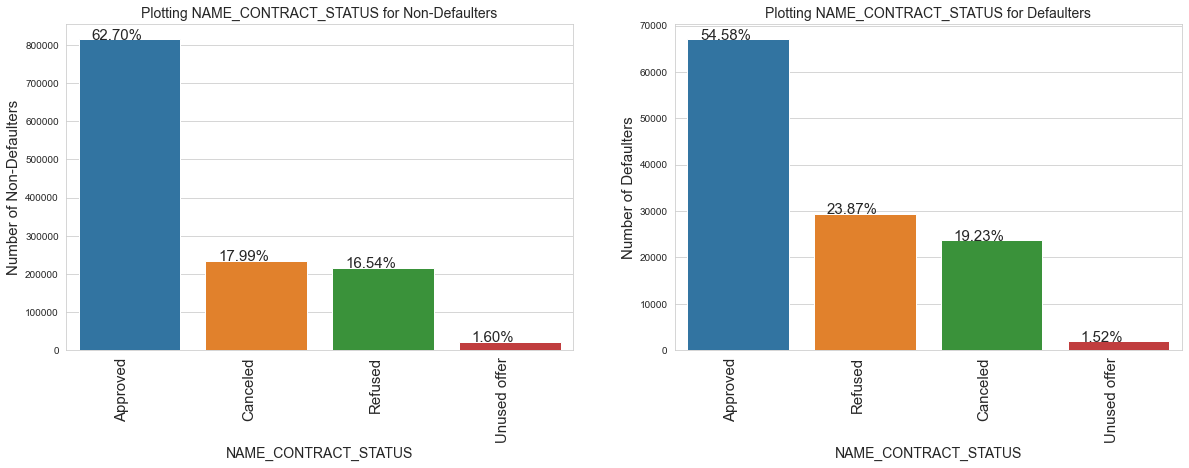

In [142]:
plot_merged_func(df_merged_tg0, df_merged_tg1, 'NAME_CONTRACT_STATUS')

Observations: 
1.  Approval rate is lower in case of Defaulters. This implies that due to some reason, their applications did not meet the bank's conditions and were not approved. Hence the cancelled % is higher in case of defaulters.
2.  Refused % is also higher for defaulters, it might be because they had refused earlier loans even if they were approved, beacuse of unstable monetary situation and hence defaulted in paying back. So if a customer had refused earlier loans, it might be an indicator that he/she may default in the future. 

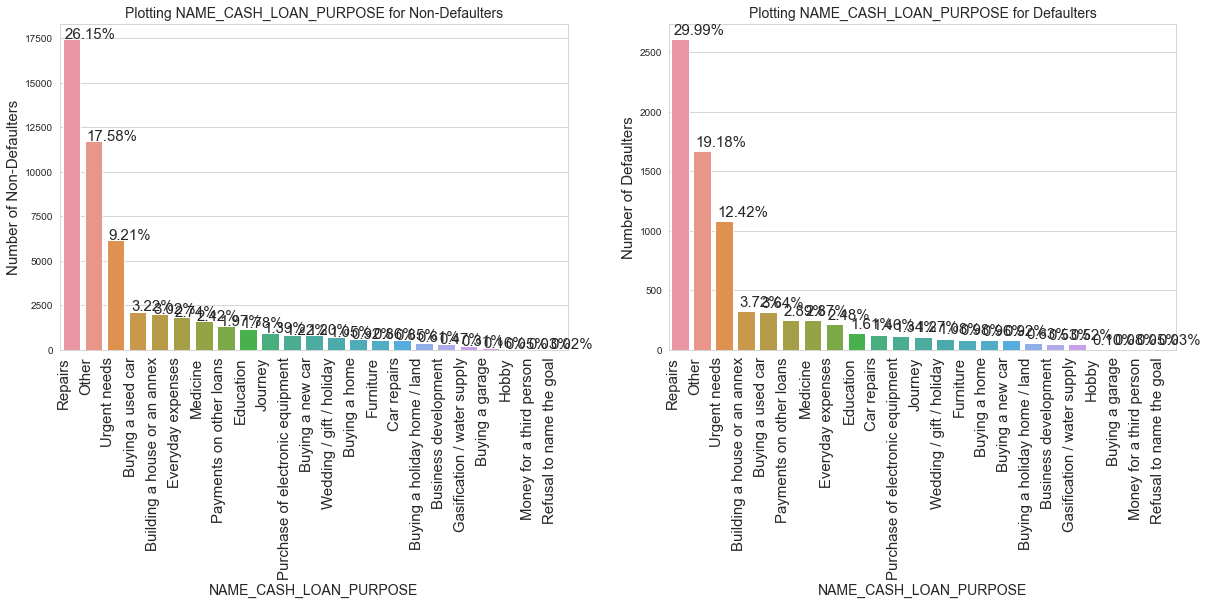

In [143]:
df_merged_tg0_pur = df_merged_tg0[df_merged_tg0.NAME_CASH_LOAN_PURPOSE != 'Unknown']
df_merged_tg1_pur = df_merged_tg1[df_merged_tg1.NAME_CASH_LOAN_PURPOSE != 'Unknown']
plot_merged_func(df_merged_tg0_pur, df_merged_tg1_pur, 'NAME_CASH_LOAN_PURPOSE')

Observations:
1. Repairs, Other, and Urgent needs are among the top reasons for taking loan in both cases, though their percentages are higher in case of defaulters. 
2. 'Payments on other loans' and 'Car repairs' are comparatively higher in the list for defaulters. Hence, these two are indicators of unstable financial situation and the customer might fail to repay loans. 

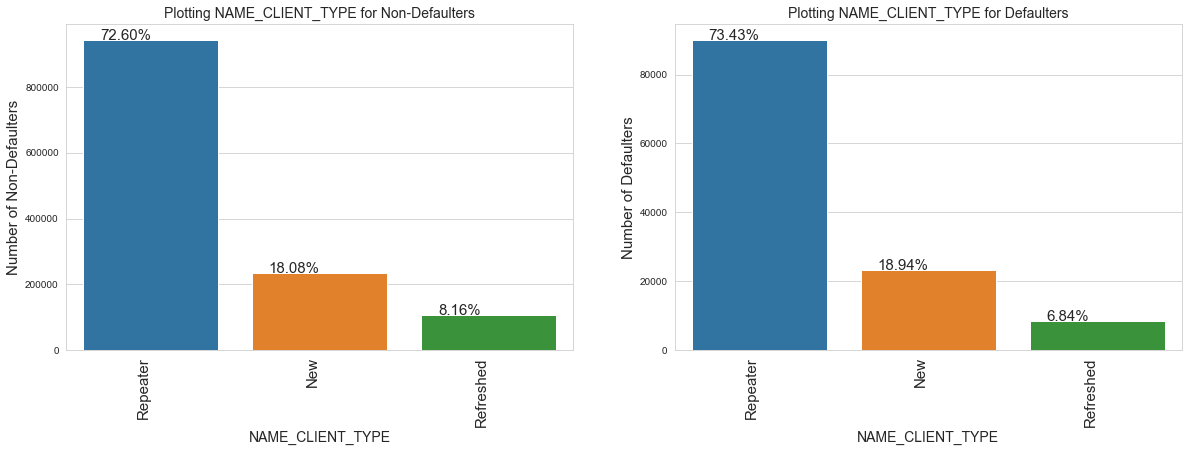

In [144]:
plot_merged_func(df_merged_tg0, df_merged_tg1, 'NAME_CLIENT_TYPE')

Observations:
1. New clients have a higher % in the Defaulters population compared to Non-defaulters. Thus, if a person is a new applicant, the bank should take care of their background verication before approving loans. 

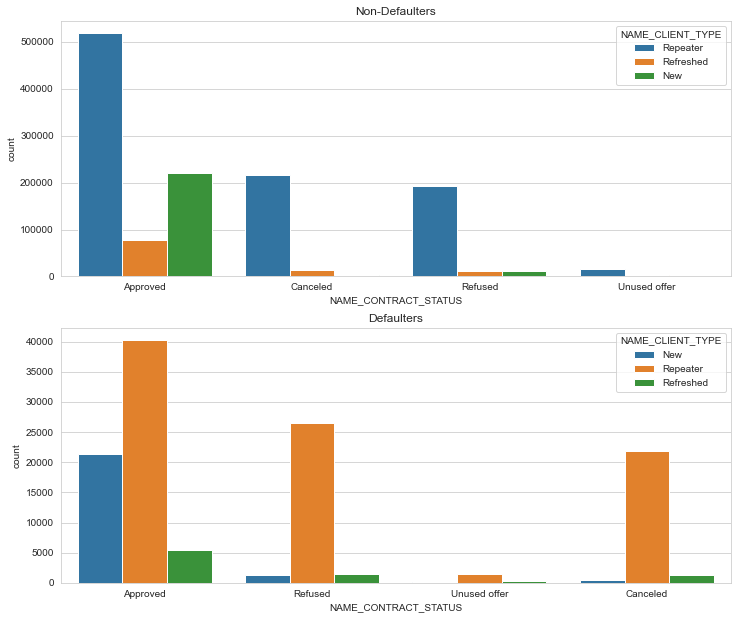

In [145]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.title('Non-Defaulters')
sns.countplot(data=df_merged_tg0, x='NAME_CONTRACT_STATUS', hue='NAME_CLIENT_TYPE')

plt.subplot(2,1,2)
plt.title('Defaulters')
sns.countplot(data=df_merged_tg1, x='NAME_CONTRACT_STATUS', hue='NAME_CLIENT_TYPE')

plt.subplots_adjust(bottom=0.1)
plt.show()

Observations: 

*Non-Deafulters*
1. New customer applicaions did not have any history of dafaulting, hence no applications were cancelled. Hence, they could escape the verification check and can turn out to be defaulter. 
2. Only repeaters are there in Unused offer category. 

*Defaulters*
1. Repeaters are approved in higher rate, bank needs to check this. They also have high tendency to refuse. It seems that they have a lot of monetary transactions flowing in and out. They are asking for loans, but when approved, leaving it unused.
2. No new customer has left the loan amount unused.
3. New customers appliations are cancelled less, comparatively they have refused the loan little more in number.  

# Bivariate analysis

<Figure size 864x576 with 0 Axes>

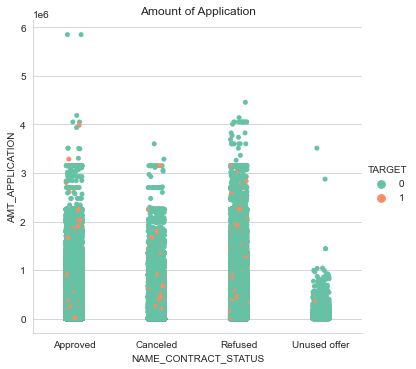

In [146]:
plt.figure(figsize=(12,8))
sns.catplot(x="NAME_CONTRACT_STATUS", y="AMT_APPLICATION", data=df_merged, hue='TARGET', palette='Set2')
plt.title('Amount of Application')

plt.show()

Text(0.5, 1.0, 'Amount of Previous Credit')

<Figure size 864x576 with 0 Axes>

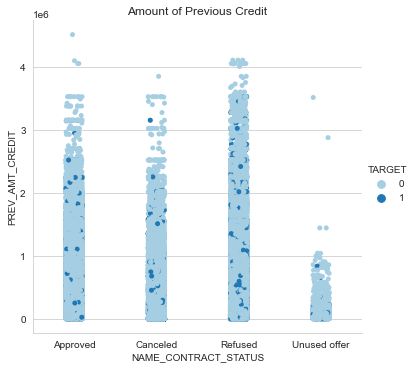

In [147]:
plt.figure(figsize=(12,8))
sns.catplot(x="NAME_CONTRACT_STATUS", y="PREV_AMT_CREDIT", data=df_merged, hue='TARGET', palette='Paired')
plt.title('Amount of Previous Credit')

Observations: 
From the above two plots, it is clear that Refused category is, in general, higher than any other category. This means people tend to apply for high amount of loans, but due to uncertainty, refuse to take the loan later on. People refusing approved loans is an indicator that the financial condition is unstable and the person is in mental dilemma. 

<Figure size 1440x576 with 0 Axes>

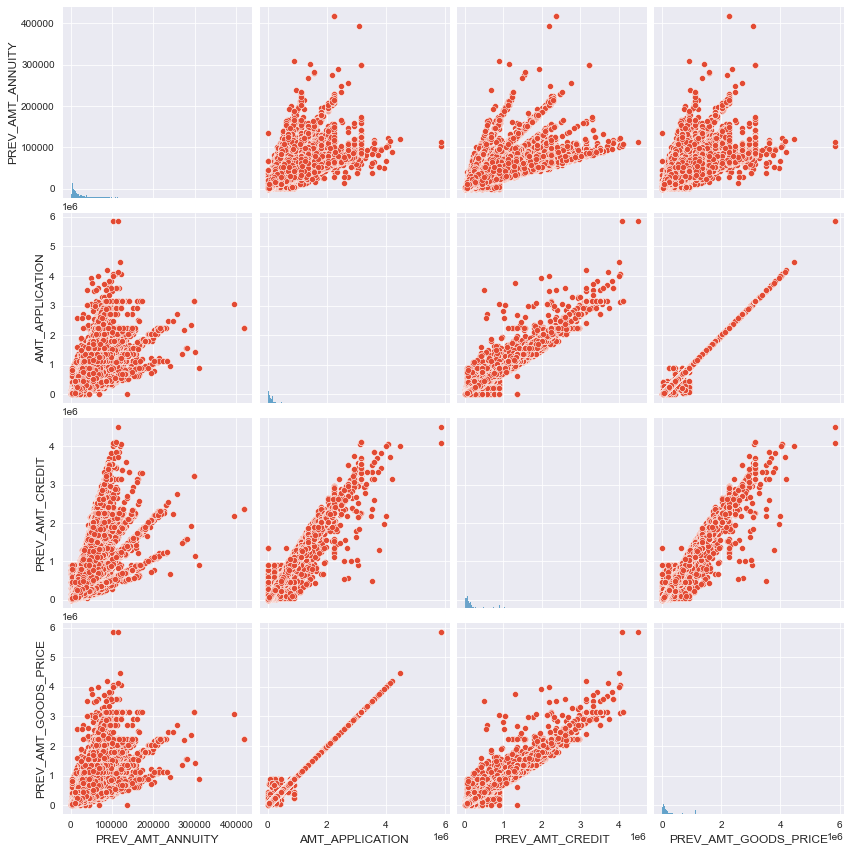

In [247]:
# Plotting the relation between the highly correlated numeric variables

plt.figure(figsize=[20,8])
sns.pairplot(df_merged[['PREV_AMT_ANNUITY', 'AMT_APPLICATION','PREV_AMT_CREDIT','PREV_AMT_GOODS_PRICE']], size = 33)
plt.show()

Observations:
1. Amount of Annuity has somewhat positive linear relation with Amount of Application, Amount of Credit and Amount of Goods Purchased.
2. Amount of Application has good positive linear relation with Amount of Credit, and has almost perfect positive correlation with Amount of Goods Purchased.
3. Amount of Credit seems to have higher linear relation (slope > 45') with Amount of application.


In [254]:
df_merged2=df_merged.copy(deep=True)
df_merged2.PRODUCT_COMBINATION.replace({'XNA' : np.NaN}, inplace=True)
df_merged2.NAME_PRODUCT_TYPE.value_counts()

x-sell     384029
walk-in    127836
Name: NAME_PRODUCT_TYPE, dtype: int64

In [265]:
pd.crosstab(index=df_merged2.TARGET, columns = df_merged2.NAME_PRODUCT_TYPE, values=df_merged2.AMT_APPLICATION, aggfunc = 'mean', dropna=True, normalize=True)

NAME_PRODUCT_TYPE,walk-in,x-sell
TARGET,,
0,0.239391,0.271914
1,0.221813,0.266883


Observation: Almost equal division in all 4 parts. 

In [259]:
df_merged.PRODUCT_COMBINATION.value_counts()

Cash                              233681
POS household with interest       225445
POS mobile with interest          189932
Cash X-Sell: middle               119550
Cash X-Sell: low                  110130
Card Street                        94232
POS industry with interest         83032
POS household without interest     71145
Card X-Sell                        66598
Cash Street: high                  51528
Cash X-Sell: high                  50643
Cash Street: middle                29859
Cash Street: low                   28496
POS other with interest            20191
POS mobile without interest        19748
POS industry without interest      10548
POS others without interest         2075
Name: PRODUCT_COMBINATION, dtype: int64

In [282]:
df_prodcomb1 = pd.crosstab(index=df_merged2.PRODUCT_COMBINATION, columns = df_merged2.TARGET, values=df_merged2.AMT_APPLICATION, aggfunc = 'mean', dropna=True, normalize=True)
df_prodcomb2 = pd.crosstab(index=df_merged2.PRODUCT_COMBINATION, columns = df_merged2.TARGET, values=df_merged2.PREV_AMT_CREDIT, aggfunc = 'mean', dropna=True, normalize=True)


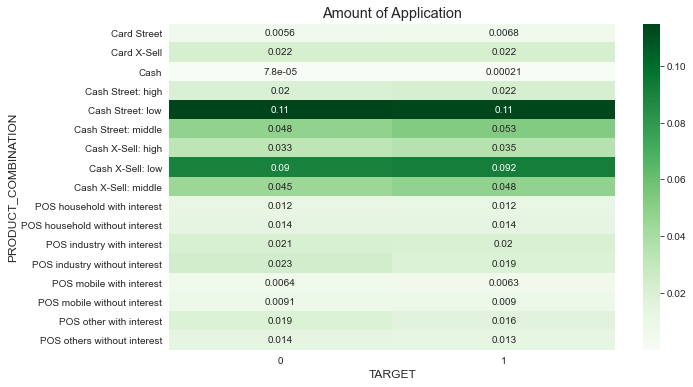

In [286]:
plt.figure(figsize=[10,6])
plt.title('Amount of Application')
sns.heatmap(df_prodcomb1, annot=True, cmap='Greens');


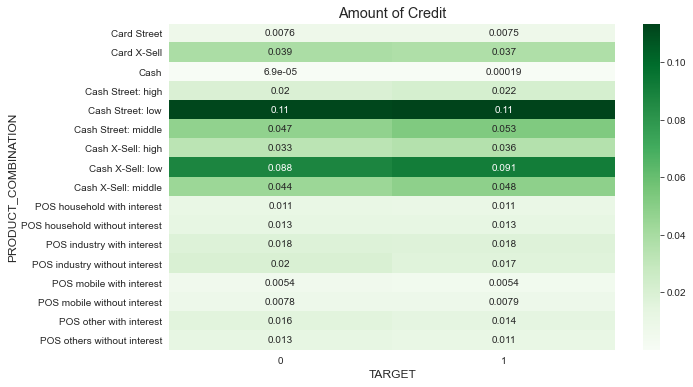

In [284]:
plt.figure(figsize=[10,6])
plt.title('Amount of Credit')
sns.heatmap(df_prodcomb2, annot=True, cmap='Greens');


Observations: 
1. Cash Street: low' is high for both targets in Amount of applications as well as Amount of credit.
2. 'Cash Street: middle', 'Cash X-Sell: low', 'Cash X-Sell: middle', 'Cash X-Sell: middle' combinations are higher for defaulters (target=1) in both Amount of application and Amount of Credit. 

In [5]:
import jovian

In [6]:
jovian.commit()

<IPython.core.display.Javascript object>

UnboundLocalError: local variable 'username' referenced before assignment